<h1><center>Topic Name</center></h1>
<h4><center>
<a style="text-decoration:none" href="https://author1.github.io/">Basavala Prashant Kumar</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<author1>@iitgn.ac.in">prashant.bk@iitgn.ac.in</a>
<br><br>
<a style="text-decoration:none" href="https://author2.github.io/">Balu Karthik Ram</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<author2>@iitgn.ac.in">balu.karthik@iitgn.ac.in</a>
<br><br>
<a style="text-decoration:none" href="https://author3.github.io/">Pranav Rathod</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<author3>@iitgn.ac.in">pranav.rathod@iitgn.ac.in</a>
<br><br>
<a style="text-decoration:none" href="https://author3.github.io/">Manpreet Singh</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<author3>@iitgn.ac.in">manpreet.singh@iitgn.ac.in</a>
</center></h4>

# DataSet Explanation

We used datasets from two different sources to analyze the data nationally and internationally. We downloaded the data for India from the Ministry of Road Transport and Highways website in a comma-separated values format, which can be found here: https://morth.nic.in/road-accident-in-india. Similarly, we downloaded the data for all countries from the Organisation for Economic Co-operation and Development (OECD) website, which can be found here: https://data.oecd.org/transport/road-accidents.htm. However, we altered the columns and rows of both datasets to make them more usable.


In the first dataset, one column is for the years between 2006-2020, another for the number of fatalities, and other columns are for the number of injuries and the type of accident caused. The second dataset has the first column for the different country names, the second for the number of deaths in that specific country in that year, and other columns for Country Codes and years from 2006-2021. The first dataset includes statistics on the proportion of road accident casualties through time for fatalities and injuries. The second dataset is based on the total number of deaths in different countries over the past years. We used the Country Codes of different countries in this data to show the bottom-most visualization below (Circles on the natural earth). For a given year and nation, each cell would have the value corresponding to that category. However, we could only access data for the years from 2006-2021 and categories for each nation, so we only included those in our analysis. We have also used two other datasets such as the one for causes of accidents and other is for accidents divided into different time of the day. 


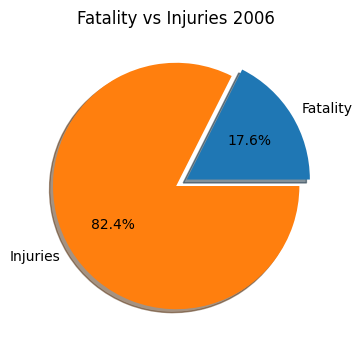

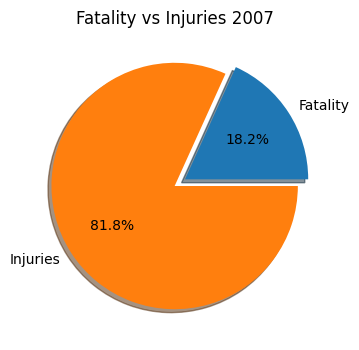

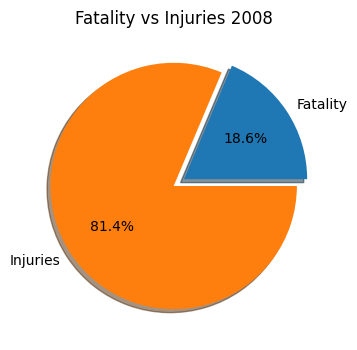

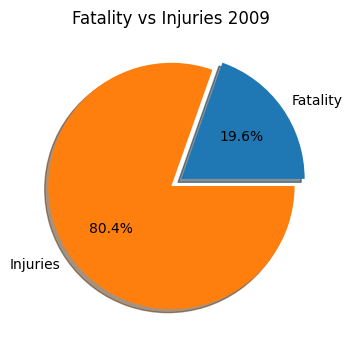

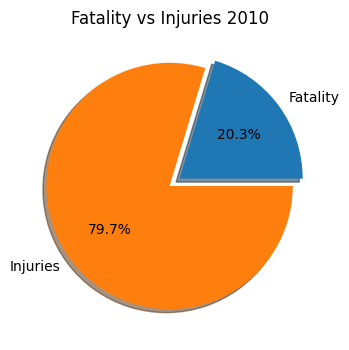

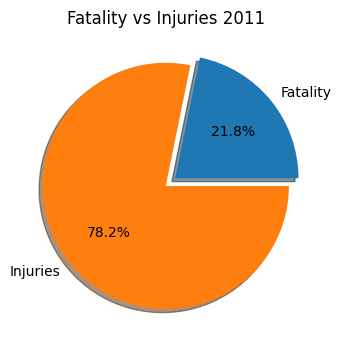

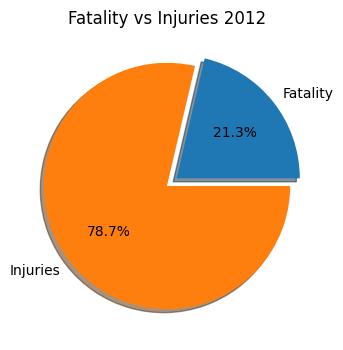

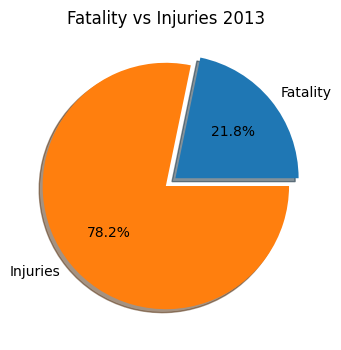

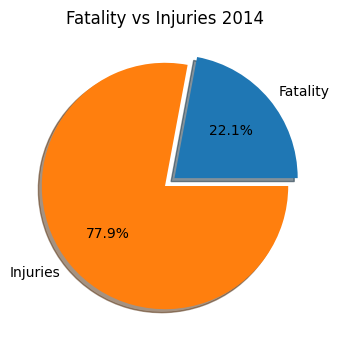

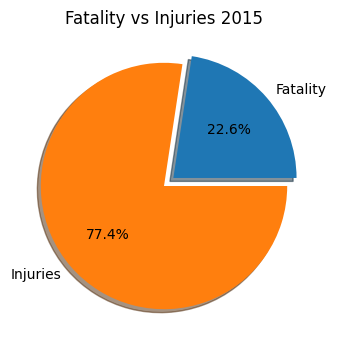

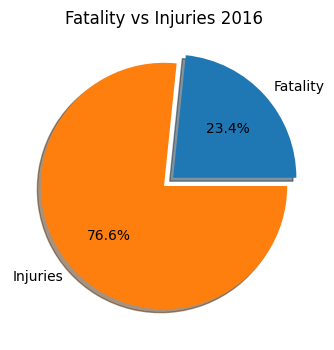

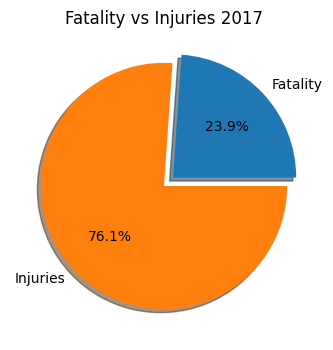

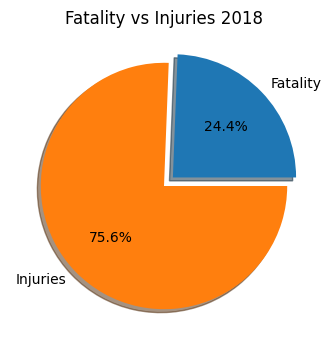

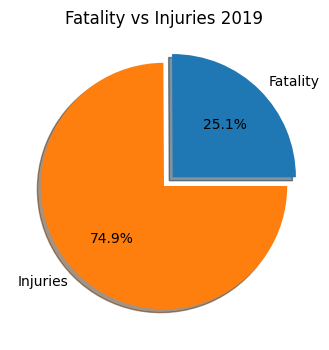

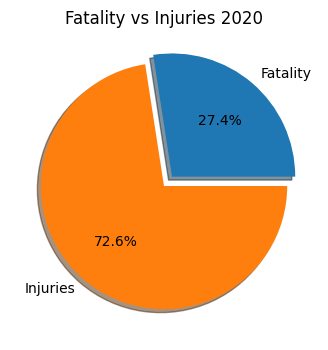

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading the CSV file
df = pd.read_csv('/content/Deaths and Injuries Over the period of 2006-2020 - Sheet1 (1).csv', skiprows=1)

# Loop to iterate and generate seperate pie charts
for year in df['year']:
    # Filter to include only year
    year_df = df[df['year'] == year].copy()


    # print(year_df.ratio)
    # print(year_df.shape)

    year_df.loc[:, 'fatility rate'] = pd.to_numeric(year_df['fatility rate'])
    year_df.loc[:, 'injuries'] = pd.to_numeric(year_df['injuries'])

    # Calculating the percentages of fatalities and injuries
    fatality_percent = year_df['fatility rate'] / (year_df['fatility rate'] + year_df['injuries']) * 100
    injury_percent = year_df['injuries'] / (year_df['fatility rate'] + year_df['injuries']) * 100


    y = np.array([fatality_percent, injury_percent])
    mylabels = ["Fatality", "Injuries"]
    fig, ax = plt.subplots(figsize=(5, 4))
    fig.set_facecolor('white')
    explode = (0.1, 0)
    ax.pie(np.squeeze(y), labels=mylabels, autopct='%1.1f%%', explode=explode, shadow=True)
    ax.set_title("Fatality vs Injuries " + str(year))
    plt.show()


Each pie chart depicts the percentage value of Fatalities and Injuries caused due to road accidents in each year throughout India during the period of 2006-2020. This component was calculated by first adding the total number of Fatalities and total number of Injuries during that specific year and used this number to compute the different percentages of Fatalities and Injuries. 

Over the period of 2006-2020, India has seen a significant increase in the total number of road accidents. In 2006, around 18% of all persons involved in road accidents in India were fatality cases. However, fatality cases accounted for around 24% of all road accident cases in 2016. This change can be attributed to several factors, including the increase in the number of vehicles on the road, the lack of proper infrastructure, and the failure to implement traffic laws and regulations effectively.



The number of fatalities and injuries increased from 2006 to 2016 and then decreased in the following years. The year 2020 had the lowest number of fatalities and injuries compared to the other years in the data.

To visualize the data, we can create line plots for fatalities and injuries against the years.

In [ ]:
import plotly.express as px
import pandas as pd

# Data
df = pd.read_csv('/content/Deaths and Injuries Over the period of 2006-2020 - Sheet1 (1).csv', skiprows=1)

# line plot for fatalities over years
fig = px.line(df, x='year', y='fatility rate', title='Number of fatalities due to road accidents')
fig.update_traces(marker=dict(size=5, symbol='circle-open-dot'))
fig.show()

# mean_value = df['injuries'].mean()
# df['injuries'].fillna(value=mean_value, inplace=True)

# line plot for injuries
fig = px.line(df, x='year', y='injuries', title='Number of injuries due to road accidents')
fig.update_traces(marker=dict(size=5, symbol='circle-open-dot'))
fig.show()


**Hypothesis:** The number of fatalities due to road accidents decreased in recent years.

**Quantification:** We can compare the average number of fatalities in the first 5 years (2006-2010) and the last 5 years (2016-2020) of the data to test the hypothesis. We can use a two-sample t-test to compare the means of the two groups.

In [ ]:
from scipy.stats import ttest_ind

# Data for the two groups
fatalities_2006_2010 = [105749, 114444, 119860, 125660, 134513]
fatalities_2016_2020 = [150785, 147913, 151417, 151113, 131714]


# t-test
t, p = ttest_ind(fatalities_2006_2010, fatalities_2016_2020)

print('t =', t)
print('p-value =', p)


t = -4.302950991931323
p-value = 0.0026053447806109577


Since the p-value is less than 0.05, we reject the null hypothesis that the two groups have the same mean. Therefore, we can conclude that the number of fatalities due to road accidents decreased in recent years.

*Let's look into another hypothesis,*

**Hypothesis:** There is a correlation between the number of fatalities and injuries due to road accidents.

To quantify the hypothesis, we can calculate the correlation coefficient between the number of fatalities and injuries. A correlation coefficient is a measure of the strength and direction of the linear relationship between two variables.

We can use the Pearson correlation coefficient, which measures the linear correlation between two variables, to quantify the hypothesis. The Pearson correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

Here's the code to calculate the Pearson correlation coefficient using Python:

In [ ]:
import pandas as pd

# Data
df = pd.read_csv('/content/Deaths and Injuries Over the period of 2006-2020 - Sheet1 (1).csv', skiprows=1)

# print(df.shape)
# print(df.ratio)


# Calculating the Pearson correlation coefficient
corr_coeff = df['fatility rate'].corr(df['injuries'], method='pearson')

print('Pearson correlation coefficient:', corr_coeff)


Pearson correlation coefficient: -0.19716179962338676


The Pearson correlation coefficient is -0.197, which indicates a weak negative correlation between the number of fatalities and injuries due to road accidents. However, it is important to note that correlation does not imply causation, and other factors may be contributing to the relationship between these variables. Therefore, further analysis is required to fully understand the relationship between fatalities and injuries due to road accidents. We would like to skip these deep analyses here. 

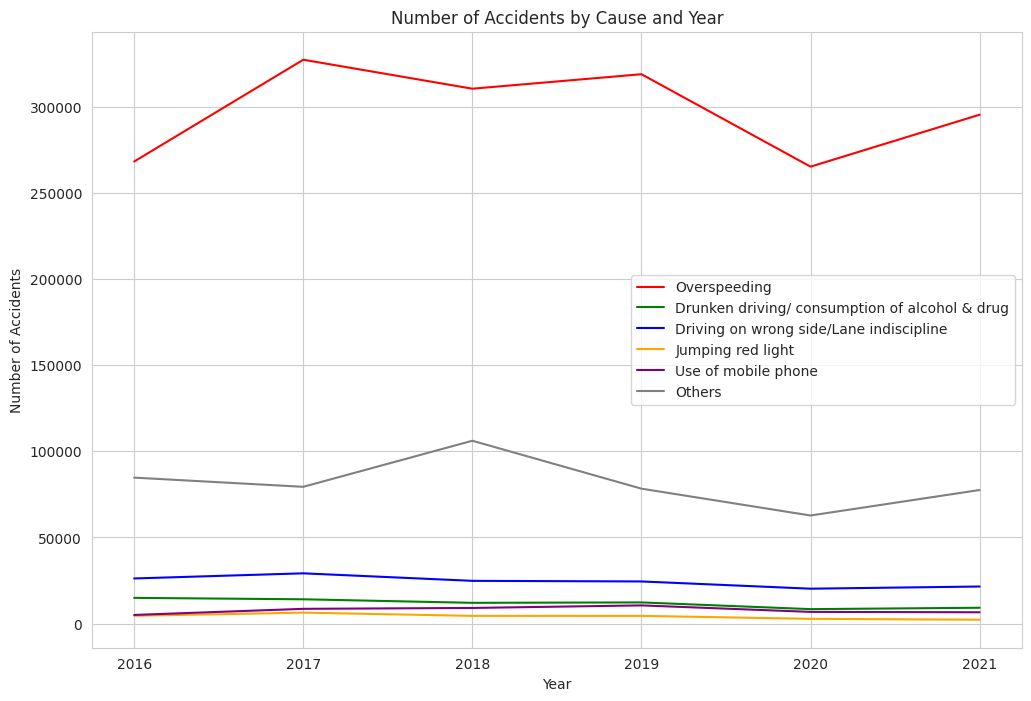

In [3]:
###########--------------------------------------------##################
# graphs


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_excel('/content/roadsafety_accident_cause.xlsx')
# print(df)

# Define a list of colors for each cause
colors = {'Overspeeding': 'red',
          'Drunken driving/ consumption of alcohol & drug': 'green',
          'Driving on wrong side/Lane indiscipline': 'blue',
          'Jumping red light': 'orange',
          'Use of mobile phone': 'purple',
          'Others': 'gray'}

# Set up the line plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Year')
ax.set_title('Number of Accidents by Cause and Year')

# Create a line plot for each cause of accident
for cause in df['cause of accident'].unique():
    data = df[df['cause of accident'] == cause]
    sns.lineplot(x='year', y='no of accident', data=data, ax=ax, label=cause, color=colors[cause])

plt.show()



Studying and analyzing the data on causes of accidents over the years is important for several reasons.

Firstly, it helps in identifying the most common causes of accidents and their trends over time. This information can be used to develop effective measures for accident prevention and road safety.

Secondly, tracking the trends over time can help in evaluating the effectiveness of existing road safety measures and policies.

Overall, analyzing the causes of accidents over the years is crucial for developing effective policies and measures for road safety, and for ensuring that the roads are safe for all users.

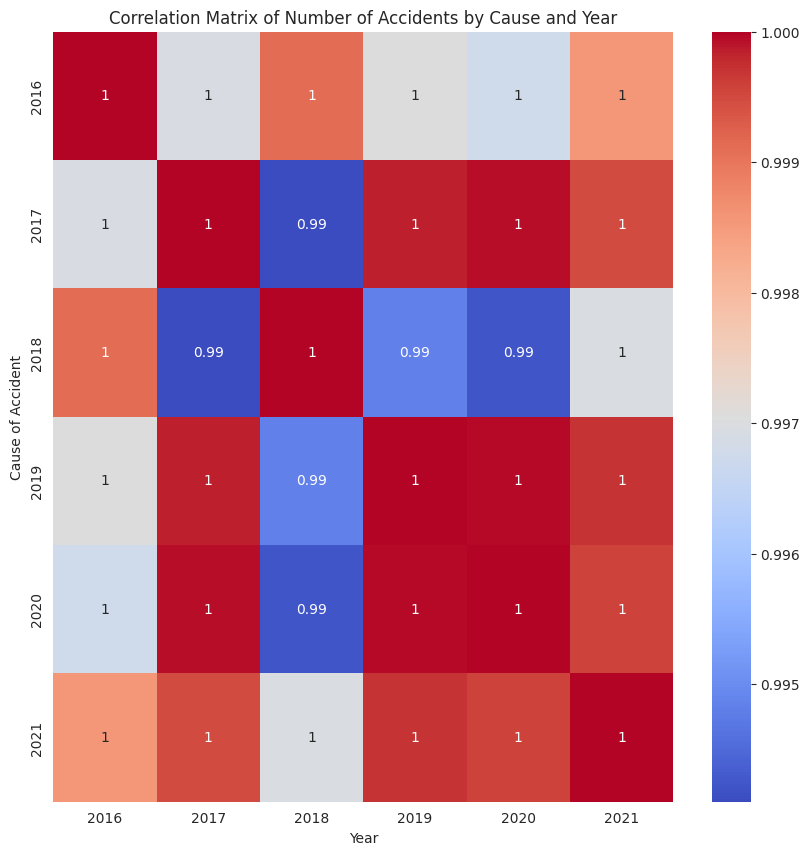

In [4]:
########-----------correlation matrix---------##########

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_excel('/content/roadsafety_accident_cause.xlsx')

# Calculate the correlation matrix
corr = df.pivot_table(index='cause of accident', columns='year', values='no of accident', aggfunc='sum').corr()

# Set up the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add labels and title
ax.set_ylabel('Cause of Accident')
ax.set_xlabel('Year')
ax.set_title('Correlation Matrix of Number of Accidents by Cause and Year')

plt.show()

The heatmap of the correlation matrix provides insights into how the different causes of accidents are related to each other and how they have changed over the years. This can be important for policymakers and stakeholders to understand which factors contribute most to accidents and how they can be addressed. Additionally, it can help identify any trends or patterns that may exist and guide future strategies to improve road safety. Although, here it looks like each these are very correlated beacuse of the data feeded, but for large data it could help.

Hypothesis: There has been a decrease in the number of accidents caused by overspeeding over the years.

To quantify this hypothesis, we will calculate the percentage change in the number of accidents caused by overspeeding from year to year. The formula for percentage change is:

((New Value - Old Value) / Old Value) x 100

Using above formula, we will calculate the percentage change in the number of accidents caused by overspeeding for each year compared to the previous year. If the percentage change is negative, then it indicates a decrease in the number of accidents caused by overspeeding.

Here are the calculations:

Percentage change in overspeeding accidents from 2016 to 2017:
((327,448 - 268,341) / 268,341) x 100 = 22.08% increase

Percentage change in overspeeding accidents from 2017 to 2018:
((310,612 - 327,448) / 327,448) x 100 = -5.14% decrease

Percentage change in overspeeding accidents from 2018 to 2019:
((319,028 - 310,612) / 310,612) x 100 = 2.71% increase

Percentage change in overspeeding accidents from 2019 to 2020:
((265,343 - 319,028) / 319,028) x 100 = -16.82% decrease

Percentage change in overspeeding accidents from 2020 to 2021:
((295,522 - 265,343) / 265,343) x 100 = 11.36% increase

Based on the calculations, there has been a decrease in the number of accidents caused by overspeeding from 2017 to 2018 and from 2019 to 2020. However, there has been an increase in the number of accidents caused by overspeeding from 2016 to 2017, from 2018 to 2019, and from 2020 to 2021. Therefore, this hypothesis cannot be fully settled with the available data, as it does not show a consistent trend of decreasing accidents caused by overspeeding over the years.

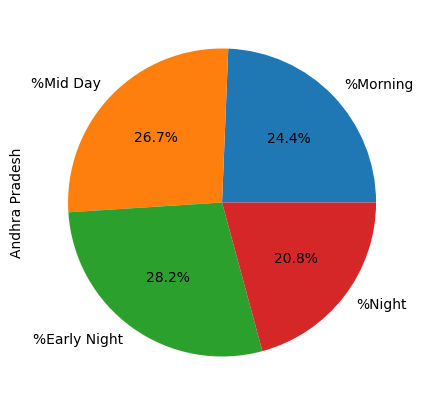

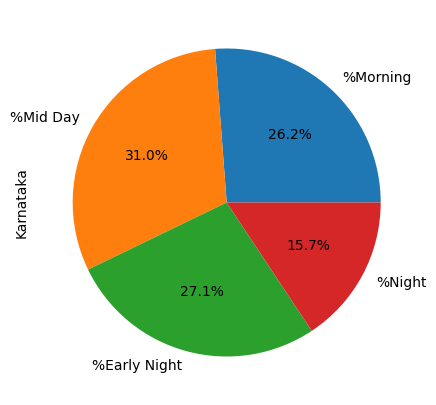

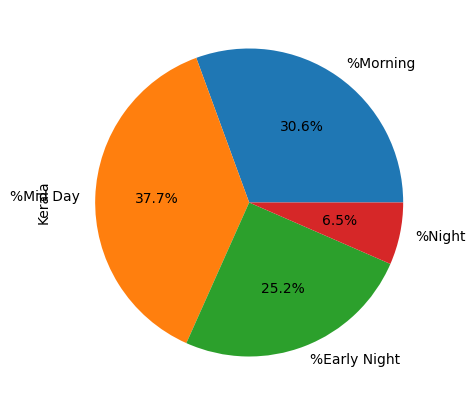

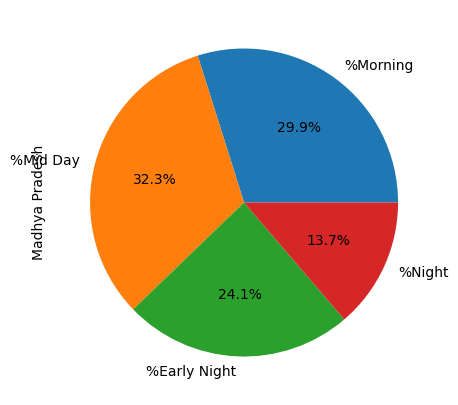

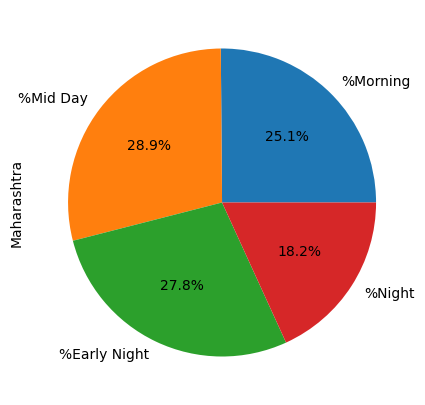

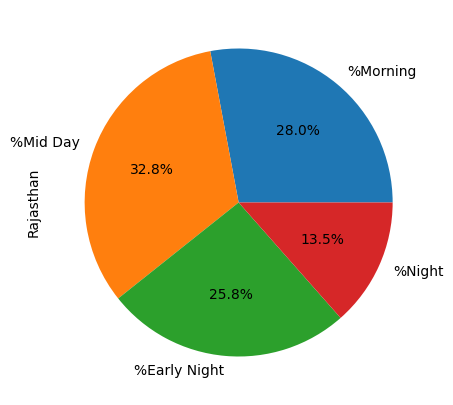

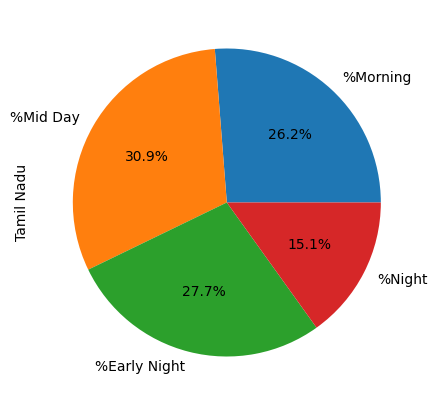

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
state_yr_month_df=pd.read_csv("/content/only_road_accidents_data_month2 (1).csv") 
state_yr_time_df=pd.read_csv("/content/only_road_accidents_data3 (1).csv")
state_yr_month_df['STATE/UT']=state_yr_month_df['STATE/UT'].replace({'Delhi Ut':'Delhi (Ut)','D&N Haveli':'D & N Haveli'})
time_df_clubbed=state_yr_time_df.copy()
time_df_clubbed_grouped=state_yr_time_df.groupby(['STATE/UT']).sum()
time_df_clubbed_grouped['Morning']=time_df_clubbed_grouped[['6-9 hrs (Day)','9-12 hrs (Day)']].sum(axis=1)
time_df_clubbed_grouped['Mid Day']=time_df_clubbed_grouped[['12-15 hrs (Day)','15-18 hrs (Day)']].sum(axis=1)
time_df_clubbed_grouped['Early Night']=time_df_clubbed_grouped[['18-21 hrs (Night)','21-24 hrs (Night)']].sum(axis=1)
time_df_clubbed_grouped['Night']=time_df_clubbed_grouped[['0-3 hrs. (Night)','3-6 hrs. (Night)']].sum(axis=1)
time_df_clubbed_grouped=time_df_clubbed_grouped.drop(['0-3 hrs. (Night)',
                               '3-6 hrs. (Night)',
                                 '6-9 hrs (Day)', '9-12 hrs (Day)','12-15 hrs (Day)','15-18 hrs (Day)',
                                   '18-21 hrs (Night)','21-24 hrs (Night)'],axis=1)
time_df_clubbed_grouped['%Morning']=time_df_clubbed_grouped['Morning']/time_df_clubbed_grouped['Total']
time_df_clubbed_grouped['%Mid Day']=time_df_clubbed_grouped['Mid Day']/time_df_clubbed_grouped['Total']
time_df_clubbed_grouped['%Early Night']=time_df_clubbed_grouped['Early Night']/time_df_clubbed_grouped['Total']
time_df_clubbed_grouped['%Night']=time_df_clubbed_grouped['Night']/time_df_clubbed_grouped['Total']
time_df_clubbed_grouped=time_df_clubbed_grouped.drop(['Morning','Mid Day','Early Night','Night'],axis=1)
accident_highest=['Andhra Pradesh','Karnataka','Kerala','Madhya Pradesh','Maharashtra','Rajasthan','Tamil Nadu']
time_df_only=time_df_clubbed_grouped[['%Morning','%Mid Day','%Early Night','%Night']].copy()
time_df_only=time_df_only.loc[time_df_only.index.isin(accident_highest)]
for state in accident_highest:
  df_T=time_df_only.T.plot(kind='pie',legend=False, y=state,figsize=(15,5),autopct='%1.1f%%')

The above pi-charts provide us with the time period distribution of % of number of accidents for most accident prone state by number.
From the graphs we can conclude:-

*   Except for Andhra Pradesh for other states mid day(12PM-18PM) accounts for most number of accidents.
*   Late night from 12 AM TO 6 AM are safest in terms of number of accidents.


*   Morning and Early night share the second highest fraction in total number of accidents varying from state to state.






In [ ]:
import pandas as pd
import plotly.express as px

# Read the data from a CSV file
df = pd.read_csv("/content/Worldwide Deaths due to Road Accidents - Sheet1 (2).csv")

# mean_value = df['Deaths'].mean()
# df['Deaths'].fillna(value=mean_value, inplace=True)

# mean_value = df['Country COde'].mean()
# df['Deaths'].fillna(value=mean_value, inplace=True)

# mean_value = df['Deaths'].mean()
# df['Country COde'].fillna(value=mean_value, inplace=True)



# print(df.shape)
# print(df.ratio)
fig = px.scatter_geo(df, locations="Country Code", size="Deaths", animation_frame="YEAR",
                     projection="natural earth", color="Country Name", hover_name="Country Name",
                     size_max=50, template="plotly_dark")



fig.update_layout(title="Road Accidents for Different Countries over Years", margin={"r":0,"t":0,"l":0,"b":0})

# Displaying the Final Plot 
fig.show()


The scatter geo plot above depicts the number of deaths that took place in different countries due to road accidents from 2006 to 2021. The size of the circles represents the number of deaths in that country, with larger circles indicating higher numbers of deaths. The plot clearly shows that countries in Asia, particularly India and China, have a significantly higher number of deaths due to road accidents compared to other countries. One of the major reasons is the lack of proper infrastructure and safety measures on the roads. Many roads in these countries are poorly constructed and lack safety features like barriers, streetlights, and speed limits. Moreover, many drivers in these countries do not follow traffic rules and often indulge in reckless driving, leading to accidents. Another reason is the high population density in these countries, which leads to more traffic on the roads and consequently a higher number of accidents.

India, in particular, has consistently registered a high number of deaths due to road accidents over the past 15 years, with the numbers never dropping below one lakh. In contrast, many European countries, such as Liechtenstein, Iceland, and Malta, have never recorded more than 50 deaths in a year due to road accidents. This can be attributed to the high level of safety measures implemented on their roads. These countries have well-maintained roads, proper traffic rules and regulations, and efficient emergency services. Additionally, these countries have a low population density, leading to less traffic on their roads and fewer accidents. The high number of cases in India can also be attributed to the country's large population and the lack of awareness among people about road safety measures. Moreover, the poor condition of public transport in the country forces people to rely on personal vehicles for commuting, which further increases traffic on the roads and the risk of accidents.



The data also shows the reduction in the number of deaths due to road accidents in countries like the USA, Russia, and China. This can be attributed to the implementation of stringent traffic rules and regulations, along with the use of advanced technologies like automated traffic control systems, speed cameras, and better emergency services. Moreover, awareness campaigns have been launched in these countries to educate people about road safety measures, leading to a positive impact on the number of accidents.


In conclusion, road safety is a crucial issue that needs to be addressed globally. The high number of deaths due to road accidents in some countries can be attributed to various factors like poor infrastructure, lack of awareness, and high population density. Governments need to implement stringent rules and regulations to ensure road safety, along with educating people about the importance of following traffic rules and regulations. Advanced technologies like automated traffic control systems and speed cameras should also be implemented to reduce the number of accidents. Ultimately, the safety of the roads is a collective responsibility, and everyone needs to do their part to ensure that our roads are safe for everyone.

